In [1]:
from PIL import Image
import os
from matplotlib import pyplot as plt
import numpy as np
from utils.ir_temp_getter import ir_temp_getter

700 525


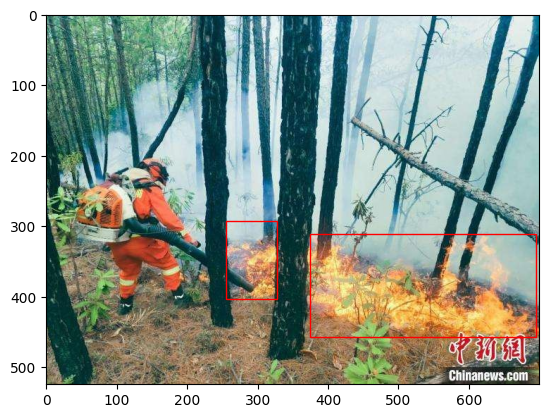

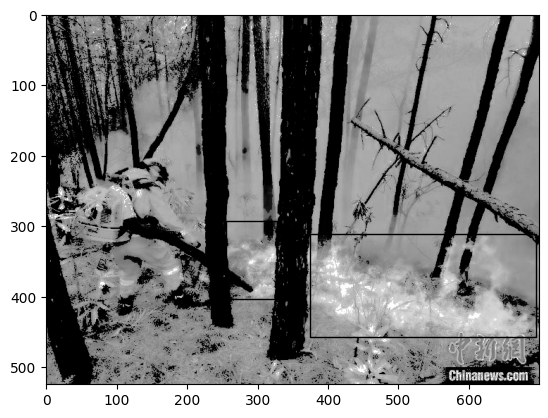

In [2]:

root_path = 'datasets/fire_and_smoke_detect/val'

name = '000001'
img = Image.open(os.path.join(root_path,'images',name+'.jpg'),'r')
with open(os.path.join(root_path,'labels',name+'.txt'),'r') as f: 
    labels = []
    for line in f.readlines():
        labels.append(line.split())
width, height = img.size
print(width,height)
plt.imshow(img)
for label in labels:
    x,y,w,h = [float(item) for item in label[1:]]
    x *= width
    #
    y *= height
    #
    w *= width
    h *= height
    x-= w/2
    y-= h/2
    # Draw box on the image
    currentAxis = plt.gca()
    currentAxis.add_patch(plt.Rectangle((x,y),w,h,fill=False,color='red'))
plt.show()
temp_getter_object = ir_temp_getter()
original = np.asarray(img).transpose(2,0,1)/256
new_matrix = temp_getter_object.get_temperature(original)
plt.imshow(new_matrix,cmap='grey')
for label in labels:
    x,y,w,h = [float(item) for item in label[1:]]
    x *= width
    #
    y *= height
    #
    w *= width
    h *= height
    x-= w/2
    y-= h/2
    # Draw box on the image
    currentAxis = plt.gca()
    currentAxis.add_patch(plt.Rectangle((x,y),w,h,fill=False,color='black'))
plt.show()